In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
my_example_nc_file = '/Users/joshua/desktop/edav-project/NOAA_Daily_phi_500mb.nc'
file = Dataset(my_example_nc_file, mode='r')

In [4]:
lons = file.variables['X'][:]
lats = file.variables['Y'][:]
pressure = file.variables['P'][:]
time = file.variables['T'][:]
height = file.variables['phi'][:]

In [5]:
file.close()

In [6]:
m = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

In [6]:
# Because our lon and lat variables are 1D, 
# use meshgrid to create 2D arrays 
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

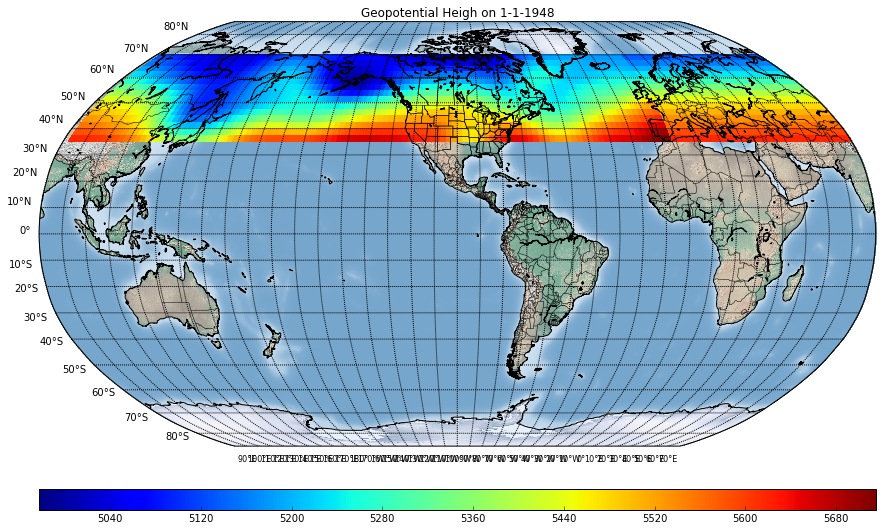

In [11]:
plt.figure(figsize=(15,13))
# Plot Data
cs = m.pcolor(xi,yi,height[0,0])

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=8)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.shadedrelief()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title("Geopotential Heigh on 1-1-1948")

In [37]:
lons.shape

(144,)

In [13]:
time.shape

(24873,)

In [14]:
lats.shape

(15,)

In [15]:
#4 dimensional tensor: time by geopotential height by latitude by longitude
height.shape

(24873, 1, 15, 144)

In [16]:
#height[0, 0] is the 2d array of geopotential heights for day 0 (the first index). First dimension is latitude,
#second dimension is longitude.
#e.g., height[1,0] is the 2d array of geopotential heights for day 1, etc.
height[0, 0].shape

(15, 144)

In [17]:
height[0, 0]

array([[ 5181.,  5180.,  5178., ...,  5180.,  5181.,  5181.],
       [ 5187.,  5186.,  5186., ...,  5188.,  5188.,  5187.],
       [ 5197.,  5195.,  5195., ...,  5203.,  5201.,  5199.],
       ..., 
       [ 5679.,  5662.,  5638., ...,  5691.,  5694.,  5690.],
       [ 5702.,  5687.,  5664., ...,  5713.,  5715.,  5711.],
       [ 5722.,  5711.,  5693., ...,  5726.,  5728.,  5727.]], dtype=float32)

In [2]:
floods = pd.read_excel("/Users/joshua/desktop/ncdf/GlobalFloodsRecord.xls")

In [3]:
floods.columns

Index(['Register #', 'Annual DFO # (discontinued)', 'Glide #', 'Country',
       'Other', 'Nations', ' Affected',
       'Detailed Locations (click on active links to access inundation extents)',
       'Validation (post event #3503)', 'Began', 'Ended', 'Duration in Days',
       'Dead', 'Displaced', 'Damage (USD)', 'Main cause', 'Severity *',
       'Affected sq km', 'Magnitude (M)**', 'Centroid X', 'Centroid Y',
       '"News" if validated', 'M>6', 'Total annual floods M>6', 'M>4',
       'Total annual floods M>4', 'Date Began', 'Total floods M>6',
       'Total floods M>4',
       'Notes and Comments (may include quoted headlines from copyrighted news stories; for internal research purposes only)',
       'Unnamed: 30'],
      dtype='object')

In [4]:
features = ['Country', 'Other', 'Began', 'Ended', 
            'Duration in Days', 'Dead', 'Displaced',
           'Main cause', 'Severity *',
           'Affected sq km', 'Magnitude (M)**', 'Centroid X', 'Centroid Y',
           '"News" if validated', 'M>6', 'Total annual floods M>6', 'M>4',
           'Total annual floods M>4', 'Date Began', 'Total floods M>6',
           'Total floods M>4',
           'Notes and Comments (may include quoted headlines from copyrighted news stories; for internal research purposes only)',]

In [5]:
map_features = ['Began', 'Ended', 'Duration in Days', 'Centroid X', 'Centroid Y', 'Affected sq km', 'Dead', 'Displaced']

In [6]:
flood_df = floods[map_features].dropna()

In [7]:
flood_df.head()

,Began,Ended,Duration in Days,Centroid X,Centroid Y,Affected sq km,Dead,Displaced
0,2015-12-05,2016-01-06,33,-2.77486,54.98680,36750.19,3,64000
1,2015-12-12,2016-01-06,26,121.22900,12.83570,6147.67,40,20000
2,2015-12-01,2016-01-06,37,39.51330,-2.03643,103769.52,112,100000
3,2015-12-23,2016-01-06,15,152.12100,-30.35710,66654.94,0,0
4,2015-12-01,2016-01-06,37,-55.84820,-26.03690,574056.99,12,170000


In [29]:
# Create empty lists for the data we are interested in.
lats = flood_df["Centroid Y"].tolist()
lons = flood_df["Centroid X"].tolist()
magnitudes = flood_df["Dead"].tolist()
sqkm = flood_df["Affected sq km"].tolist()
began = flood_df["Began"].values.tolist()
ended = flood_df["Ended"].values.tolist()
dead = flood_df["Dead"].values.tolist()
displaced = flood_df["Displaced"].values.tolist()
duration = flood_df["Duration in Days"].values.tolist()

In [38]:
flood_df["Duration in Days"].max()

419.0

In [27]:
(flood_df["Ended"] - flood_df["Began"]).median()

Timedelta('5 days 00:00:00')

In [9]:
df = flood_df.rename(columns={'Centroid X': 'longitude', 'Centroid Y': 'latitude'})

In [16]:
df.to_csv("flood-mapping.csv", index=False)

In [106]:
def latlng(lats, lons, began, ended, sqkm):
    arr = []
    limit = len(lats)
    for i in range(limit):
        try:
            arr.append([lats[i], lons[i], began[i], ended[i], sqkm[i]])
        except:
            pass
    return arr

In [31]:
def mapdata(lats, lons, began, ended, sqkm, dead, displaced, duration):
    starting = {}
    ending = {}
    limit = len(lats)
    for i in range(limit):
        if began[i] not in starting:
            try:
                starting[began[i]] = [{"Latitude": lats[i], "Longitude": lons[i], 
                                       "Dead": dead[i], "Displaced": displaced[i],
                                      "sqkm": sqkm[i], "Ended": ended[i], "Duration": duration[i]}]
            except:
                pass
        else:
            try:
                starting[began[i]].append({"Latitude": lats[i], "Longitude": lons[i], 
                                       "Dead": dead[i], "Displaced": displaced[i],
                                      "sqkm": sqkm[i], "Ended": ended[i], "Duration": duration[i]})
            except:
                pass
    floods = {"Starting": starting}
    return floods

In [32]:
import json

In [34]:
json.dumps(mapdata(lats, lons, began, ended, sqkm, dead, displaced, duration))

'{"Starting": {"1449273600000000000": [{"Latitude": 54.9868, "Duration": 33.0, "Ended": 1452038400000000000, "sqkm": 36750.19, "Longitude": -2.77486, "Dead": 3.0, "Displaced": 64000.0}], "1449878400000000000": [{"Latitude": 12.8357, "Duration": 26.0, "Ended": 1452038400000000000, "sqkm": 6147.67, "Longitude": 121.229, "Dead": 40.0, "Displaced": 20000.0}], "582076800000000000": [{"Latitude": 40.0061, "Duration": 1.0, "Ended": 582076800000000000, "sqkm": 229.14, "Longitude": 32.9515, "Dead": 16.0, "Displaced": 400.0}], "896832000000000000": [{"Latitude": 66.6416, "Duration": 5.0, "Ended": 897177600000000000, "sqkm": 56635.43, "Longitude": 52.982, "Dead": 0.0, "Displaced": 49.0}], "924134400000000000": [{"Latitude": 8.22671, "Duration": 7.0, "Ended": 924652800000000000, "sqkm": 27207.35, "Longitude": 126.304, "Dead": 11.0, "Displaced": 200.0}], "1107907200000000000": [{"Latitude": 26.1547, "Duration": 8.0, "Ended": 1108512000000000000, "sqkm": 123212.59, "Longitude": 64.3806, "Dead": 300.

In [107]:
coords = mapdata(lats, lons, began, ended, sqkm)

In [109]:
import io

with io.open('coords.txt', 'w', encoding='unicode-escape') as f:
    for line in coords:
        f.writelines(str(line) + u',')

In [96]:
flood_df.head()

,Began,Ended,Duration in Days,Centroid X,Centroid Y,Affected sq km,Dead,Displaced
0,2015-12-05,2016-01-06,33,-2.77486,54.98680,36750.19,3,64000
1,2015-12-12,2016-01-06,26,121.22900,12.83570,6147.67,40,20000
2,2015-12-01,2016-01-06,37,39.51330,-2.03643,103769.52,112,100000
3,2015-12-23,2016-01-06,15,152.12100,-30.35710,66654.94,0,0
4,2015-12-01,2016-01-06,37,-55.84820,-26.03690,574056.99,12,170000


In [101]:
def latlngdict(lats, lons, began, ended, sqkm):
    d = [{}]
    limit = len(began)
    for i in range(limit):
        if began[i] in d:
            try:
                d[began[i]]["lats"].extend(lats[i])
                d[began[i]]["lons"].extend(lons[i])
                d[began[i]]["ended"].extend(ended[i])
                d[began[i]]["sqkm"].extend(sqkm[i])
            except:
                pass
        else:
            d[began[i]]["lats"] = [lats[i]]
            d[began[i]]["lons"] = [lons[i]]
            d[began[i]]["ended"] = [ended[i]]
            d[began[i]]["sqkm"] = [sqkm[i]]
    return d

In [108]:
coords

[[54.986800000000002,
  -2.7748599999999999,
  1449273600000000000,
  1452038400000000000,
  36750.190000000002],
 [12.835699999999999,
  121.229,
  1449878400000000000,
  1452038400000000000,
  6147.6700000000001],
 [-2.0364300000000002,
  39.513300000000001,
  1448928000000000000,
  1452038400000000000,
  103769.52],
 [-30.357099999999999,
  152.12100000000001,
  1450828800000000000,
  1452038400000000000,
  66654.940000000002],
 [-26.036899999999999,
  -55.848199999999999,
  1448928000000000000,
  1452038400000000000,
  574056.98999999999],
 [35.665799999999997,
  -91.082899999999995,
  1450137600000000000,
  1452038400000000000,
  526834.76000000001],
 [41.287100000000002,
  19.965900000000001,
  1448064000000000000,
  1449187200000000000,
  11409.690000000001],
 [-0.14429500000000001,
  73.1892,
  1448409600000000000,
  1449187200000000000,
  6371.3800000000001],
 [33.983899999999998,
  -100.238,
  1448496000000000000,
  1449187200000000000,
  439381.83000000002],
 [21.6586,
  51.

In [36]:
df.Began.values()

TypeError: 'numpy.ndarray' object is not callable

In [39]:
df.groupby("Began").get_group('2015-12-01')

,Began,Ended,Duration in Days,longitude,latitude,Affected sq km,Dead,Displaced
2,2015-12-01,2016-01-06,37,39.5133,-2.03643,103769.52,112,100000
4,2015-12-01,2016-01-06,37,-55.8482,-26.03690,574056.99,12,170000


In [26]:
for a in df.Began.values:
    df.groupby("Began").get_group(a)

KeyboardInterrupt: 